In [874]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [875]:
data=pd.read_csv('flightdata.csv')

In [876]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [877]:
data.tail() 

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
11226,2016,4,12,30,5,DL,N940DL,1715,11433,DTW,...,1223,1148.0,-35.0,0.0,0.0,0.0,138.0,105.0,594.0,NaN
11227,2016,4,12,30,5,DL,N836DN,1770,14747,SEA,...,2046,2100.0,14.0,0.0,0.0,0.0,201.0,181.0,1399.0,NaN
11228,2016,4,12,30,5,DL,N583NW,1823,11433,DTW,...,2210,2154.0,-16.0,0.0,0.0,0.0,311.0,295.0,1927.0,NaN
11229,2016,4,12,30,5,DL,N554NW,1901,10397,ATL,...,1806,1801.0,-5.0,0.0,0.0,0.0,336.0,332.0,2182.0,NaN
11230,2016,4,12,30,5,DL,N843DN,2005,10397,ATL,...,925,913.0,-12.0,0.0,0.0,0.0,120.0,110.0,594.0,NaN


In [878]:
#shape of the dataset
data.shape

(11231, 26)

In [879]:
# Descriptive Analysis
data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [880]:
data.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
Unnamed: 25            float64
dtype: object

In [881]:
#missing values

data.isna().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [882]:
#Dropping null values
data['DEP_TIME'].fillna(data['DEP_TIME'].mean(),inplace=True)
data['DEP_DELAY'].fillna(data['DEP_DELAY'].mean(),inplace=True)
data['DEP_DEL15'].fillna(data['DEP_DEL15'].mean(),inplace=True)
data['ARR_TIME'].fillna(data['ARR_TIME'].mean(),inplace=True)
data['ARR_DELAY'].fillna(data['ARR_DELAY'].mean(),inplace=True)
data['ARR_DEL15'].fillna(data['ARR_DEL15'].mean(),inplace=True)
data['ACTUAL_ELAPSED_TIME'].fillna(data['ACTUAL_ELAPSED_TIME'].mean(),inplace=True)

In [883]:
data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


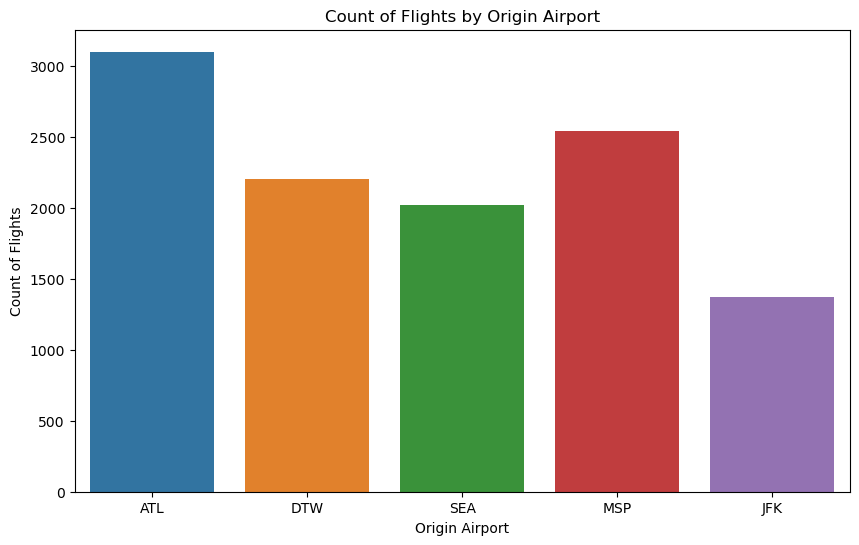

In [884]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ORIGIN', data=data)
plt.xlabel('Origin Airport')
plt.ylabel('Count of Flights')
plt.title('Count of Flights by Origin Airport')
plt.show()

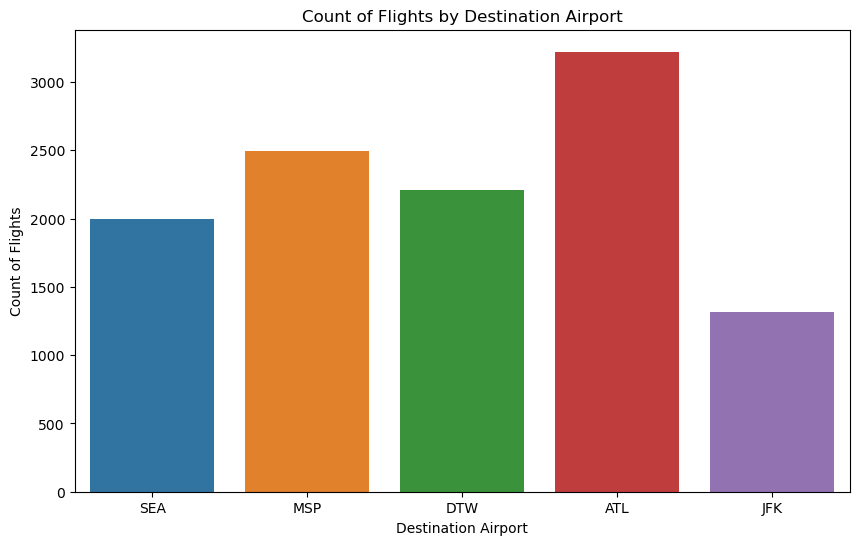

In [885]:
# Bar Chart - Count of Flights by Destination Airport
plt.figure(figsize=(10, 6))
sns.countplot(x='DEST', data=data)
plt.xlabel('Destination Airport')
plt.ylabel('Count of Flights')
plt.title('Count of Flights by Destination Airport')
plt.show()

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

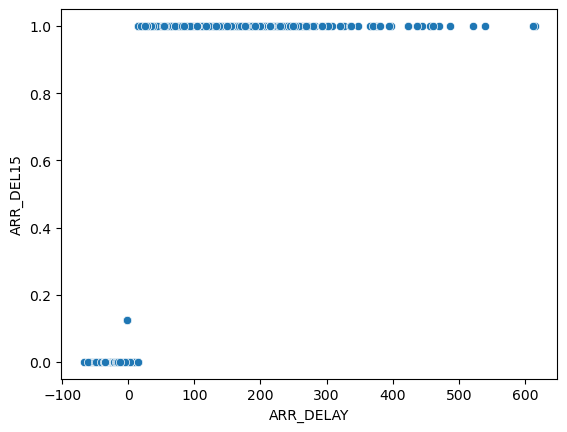

In [886]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=data)

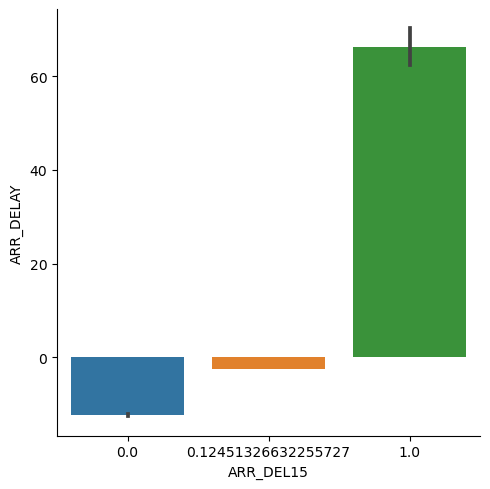

In [887]:
sns.catplot(x="ARR_DEL15",y="ARR_DELAY",kind='bar',data=data)

In [888]:
data.drop(columns=['Unnamed: 25','CANCELLED','QUARTER','TAIL_NUM','DISTANCE','DIVERTED','UNIQUE_CARRIER','YEAR','DEST_AIRPORT_ID',
                   'ORIGIN_AIRPORT_ID','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','DEP_DELAY','ARR_TIME','ARR_DELAY'],inplace=True)

In [889]:
data.head(35)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15
0,1,1,5,1399,ATL,SEA,1905,1907.0,0.0,2143,0.0
1,1,1,5,1476,DTW,MSP,1345,1344.0,0.0,1435,0.0
2,1,1,5,1597,ATL,SEA,940,942.0,0.0,1215,0.0
3,1,1,5,1768,SEA,MSP,819,820.0,0.0,1335,0.0
4,1,1,5,1823,SEA,DTW,2300,2256.0,0.0,607,0.0
5,1,1,5,1975,MSP,ATL,1129,1127.0,0.0,1459,0.0
6,1,2,6,2074,ATL,MSP,1745,1745.0,0.0,1931,0.0
7,1,2,6,2151,MSP,SEA,1740,1751.0,0.0,1929,0.0
8,1,2,6,2221,MSP,SEA,1115,1115.0,0.0,1305,0.0
9,1,2,6,2291,MSP,ATL,1430,1443.0,0.0,1801,0.0


In [890]:
print(data[['ORIGIN', 'DEST']].dtypes)

ORIGIN    object
DEST      object
dtype: object


In [891]:
print(data['ORIGIN'].unique())
print(data['DEST'].unique())

['ATL' 'DTW' 'SEA' 'MSP' 'JFK']
['SEA' 'MSP' 'DTW' 'ATL' 'JFK']


In [892]:
data.isnull().any()

MONTH           False
DAY_OF_MONTH    False
DAY_OF_WEEK     False
FL_NUM          False
ORIGIN          False
DEST            False
CRS_DEP_TIME    False
DEP_TIME        False
DEP_DEL15       False
CRS_ARR_TIME    False
ARR_DEL15       False
dtype: bool

In [893]:
data.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
11226    False
11227    False
11228    False
11229    False
11230    False
Length: 11231, dtype: bool

In [894]:
data=pd.get_dummies(data,columns=['ORIGIN'])
data=pd.get_dummies(data,columns=['DEST'])

In [895]:
data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,1399,1905,1907.0,0.0,2143,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,1476,1345,1344.0,0.0,1435,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,1597,940,942.0,0.0,1215,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,1768,819,820.0,0.0,1335,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,1823,2300,2256.0,0.0,607,0.0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11226,12,30,5,1715,1005,1003.0,0.0,1223,0.0,0,1,0,0,0,1,0,0,0,0
11227,12,30,5,1770,1525,1559.0,1.0,2046,0.0,0,0,0,0,1,0,0,0,1,0
11228,12,30,5,1823,1959,1959.0,0.0,2210,0.0,0,1,0,0,0,0,0,0,0,1
11229,12,30,5,1901,1530,1529.0,0.0,1806,0.0,1,0,0,0,0,0,0,0,0,1


In [971]:
x=data.drop('ARR_DEL15',axis=1)
y=data['ARR_DEL15']

In [972]:
from sklearn.preprocessing import StandardScaler

In [973]:
# Create an instance of the StandardScaler
sc = StandardScaler(with_mean=False)

In [974]:
x=sc.fit_transform(x)

In [975]:
x

array([[0.29810443, 0.11387362, 2.50605408, ..., 0.        , 0.        ,
        2.61691959],
       [0.29810443, 0.11387362, 2.50605408, ..., 0.        , 2.40630829,
        0.        ],
       [0.29810443, 0.11387362, 2.50605408, ..., 0.        , 0.        ,
        2.61691959],
       ...,
       [3.57725322, 3.41620853, 2.50605408, ..., 0.        , 0.        ,
        2.61691959],
       [3.57725322, 3.41620853, 2.50605408, ..., 0.        , 0.        ,
        2.61691959],
       [3.57725322, 3.41620853, 2.50605408, ..., 0.        , 0.        ,
        0.        ]])

In [976]:
y=le.fit_transform(y)

In [977]:
data.corr()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,CRS_DEP_TIME,DEP_TIME,DEP_DEL15,CRS_ARR_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
MONTH,1.000000,0.003095,-0.005027,-0.066573,0.021989,0.022581,0.017352,0.028657,0.029893,-0.013883,-0.012596,0.009460,0.009372,0.010905,0.000298,-0.015664,-0.000513,0.001084,0.015200
DAY_OF_MONTH,0.003095,1.000000,0.010415,-0.001812,0.009126,0.007489,0.011021,0.000857,-0.000592,-0.003342,0.004586,0.003233,-0.004484,0.001274,-0.009730,-0.002406,-0.002635,0.012629,0.002500
DAY_OF_WEEK,-0.005027,0.010415,1.000000,-0.004133,0.005299,0.002999,-0.000843,0.012490,-0.011936,-0.004454,-0.020619,0.017799,-0.002346,0.013870,0.010183,-0.015825,0.012535,0.000561,-0.006731
FL_NUM,-0.066573,-0.001812,-0.004133,1.000000,-0.036180,-0.042950,-0.010620,-0.081598,-0.002355,-0.001709,-0.028943,-0.160717,0.027536,0.139091,-0.047783,0.000017,-0.002113,0.024160,0.032037
CRS_DEP_TIME,0.021989,0.009126,0.005299,-0.036180,1.000000,0.964196,0.116550,0.559401,0.085328,0.156009,0.045869,-0.016882,-0.068885,-0.139629,-0.080802,0.013123,0.046591,-0.023103,0.067939
DEP_TIME,0.022581,0.007489,0.002999,-0.042950,0.964196,1.000000,0.164658,0.563342,0.127210,0.156307,0.041249,-0.007497,-0.065963,-0.146392,-0.082827,0.014973,0.045387,-0.020794,0.066911
DEP_DEL15,0.017352,0.011021,-0.000843,-0.010620,0.116550,0.164658,1.000000,0.096407,0.655340,0.004108,-0.020962,0.074363,-0.039892,-0.003122,-0.013626,-0.028734,0.041178,0.006172,0.004701
CRS_ARR_TIME,0.028657,0.000857,0.012490,-0.081598,0.559401,0.563342,0.096407,1.000000,0.077621,0.036801,-0.027895,0.021814,-0.004100,-0.028159,-0.000697,-0.062821,0.070734,-0.035982,0.045869
ARR_DEL15,0.029893,-0.000592,-0.011936,-0.002355,0.085328,0.127210,0.655340,0.077621,1.000000,-0.010882,-0.007413,0.045045,0.013879,-0.033230,-0.015386,-0.035606,0.044447,-0.004046,0.022299
ORIGIN_ATL,-0.013883,-0.003342,-0.004454,-0.001709,0.156009,0.156307,0.004108,0.036801,-0.010882,1.000000,-0.304842,-0.230531,-0.333634,-0.288981,-0.391551,0.176181,0.131995,0.127912,0.030030


<Axes: >

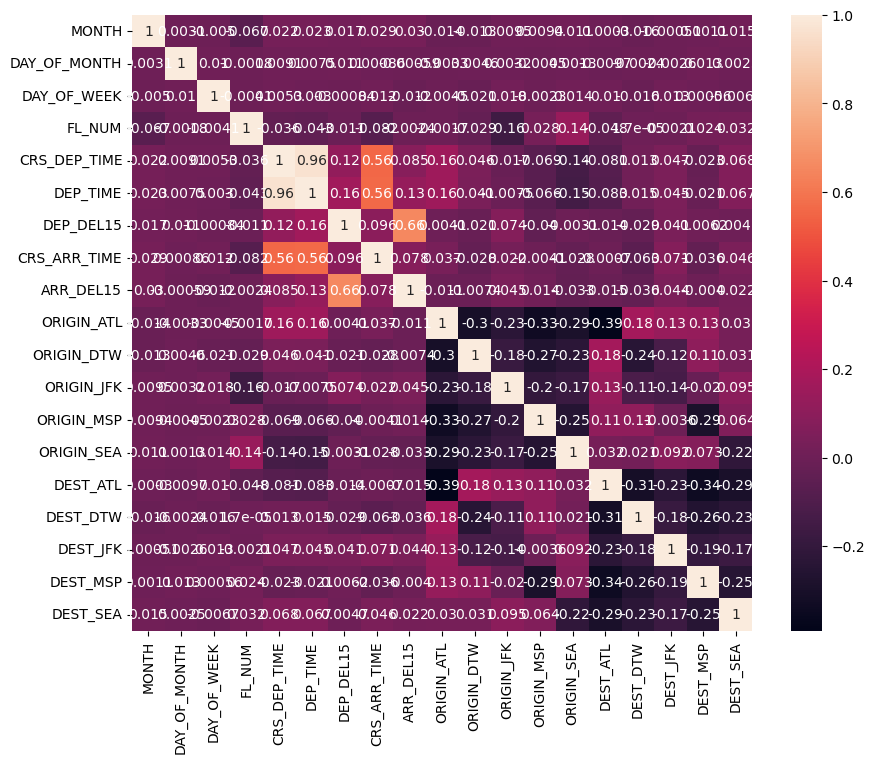

In [978]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [979]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [980]:
from sklearn.ensemble import RandomForestClassifier

In [981]:
#training the model
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [982]:
#test the model
pred=rf.predict(x_test)

In [983]:
pred

array([0, 0, 0, ..., 0, 0, 2], dtype=int64)

In [984]:
x_test.shape

(2247, 18)

In [986]:
x_train.shape

(8984, 18)

In [985]:
y_test.shape

(2247,)

In [987]:
y_train.shape

(8984,)

In [952]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [953]:
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [954]:
print(accuracy)

0.9216733422340899


In [955]:
print(conmat)

[[1890    0   46]
 [  15   21    1]
 [ 114    0  160]]


In [956]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1936
           1       1.00      0.57      0.72        37
           2       0.77      0.58      0.67       274

    accuracy                           0.92      2247
   macro avg       0.90      0.71      0.78      2247
weighted avg       0.92      0.92      0.92      2247



In [957]:
import pickle
pickle.dump(rf,open("flight.pkl","wb"))